# 4.3 연관관계 시각화
- networkx 라이브러리는 네트워크 다이어그램을 작성하기 위한 라이브러리
- 본 실습에서는 DataFrame에서 네트워크를 생성하고, matplotlib으로 시각화 하는 과정을 수행한다.
- .from_pandas_edgelist (df, source = , target =)


### 사전준비

In [1]:
# 4.3.0.1 colab에는 mlxtend 가 설치 되어 있으나 버전이 낮다. 업그레이드 한다.
!pip install mlxtend -U

In [2]:
# 4.3.0.2 수업에 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# mlxtend 라이브러리 import
from mlxtend.frequent_patterns import apriori,  association_rules
from mlxtend.preprocessing import TransactionEncoder


# 네트워크 그래프  import
import networkx as nx

In [4]:
# 4.3.0.3 수업 예시로 사용된 sample 데이터를 구성하고, 최소지지도 0.4, 최소신뢰도 0.7의 연관규칙을 생성한다.

#sample 데이터 구성
sample = [list('bcg'), list('abdef'), list('abcg'), list('bcef'),list('bcefg')]
te = TransactionEncoder ()
sample_ary = te.fit_transform (sample)
sample_tr = pd.DataFrame( sample_ary , columns =  te.columns_)
sample_tr

# 빈발항목집합과 연관규칙 생성
freq_its_sp_4 = apriori(sample_tr, min_support = 0.4, use_colnames = True)
asso_rule_sp_4_7 = association_rules(freq_its_sp_4,
                                     metric = 'confidence',
                                     min_threshold= 0.7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# 4.3.0.4 grocery 데이터를 읽어 들이고 분석에 사용할 수 있는 형태로 가공한다.
# grocery_csv : 트랜잭션별 구매항목 목록
# grocery_tr  : 트랜잭션 x 항목 형태집계표 형태

# grocery 거래정보 : 9865 트랜잭션,   169개 상품 항목
# 최소지지도 0.02에서 122개 빈발항목 생성
# 최소지지도 0.02, 최소신뢰도 0.3에서 34개 규칙 생성


# grocery 데이터를 읽어 들인다.
grocery_csv = pd.read_csv('groceries.csv',
                          header = None)

# grocery 데이터를 apyori 라이브러리에서 사용 할 수 있는 형태인 리스트 형태로 변환한다.
grocery_list = [ row_series.dropna().to_list() for idx, row_series in grocery_csv.iterrows()]

# 집계표 형태로 변환
te = TransactionEncoder()
te_ary = te.fit(grocery_list).transform(grocery_list)
grocery_tr = pd.DataFrame(te_ary, columns = te.columns_)

print (f'grocery_csv shape :{grocery_csv.shape}, grocery_tr shape : {grocery_tr.shape}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


grocery_csv shape :(9835, 32), grocery_tr shape : (9835, 169)


### 4.3.1 networkx import

In [6]:
# 4.3.1 네트워크 도표로 표현하기 위한 라이브러리 import
import matplotlib.pyplot as plt
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4.3.2 네트워크 그래프 출력(예시데이터)

In [7]:
# 4.3.2 알고리즘 비교에서 사용한 sample 데이터의 지지도 0.4, 신뢰도 0.7 로
#         도출된 연관 규칙을 시각화 한다.
# 4.3.2.1 데이터 확인

print(asso_rule_sp_4_7.shape)
asso_rule_sp_4_7.tail()

(29, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,"(b, c, f)",(e),0.4,0.6,0.4,1.0,1.666667,0.16,inf,0.666667
25,"(b, c, e)",(f),0.4,0.6,0.4,1.0,1.666667,0.16,inf,0.666667
26,"(c, f, e)",(b),0.4,1.0,0.4,1.0,1.000000,0.00,inf,0.000000
27,"(c, f)","(b, e)",0.4,0.6,0.4,1.0,1.666667,0.16,inf,0.666667
28,"(c, e)","(b, f)",0.4,0.6,0.4,1.0,1.666667,0.16,inf,0.666667


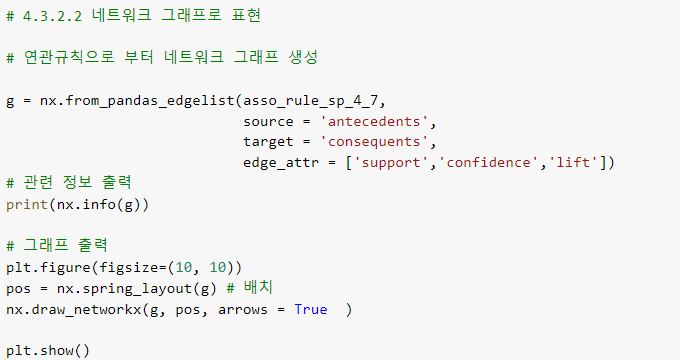

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graph with 17 nodes and 22 edges


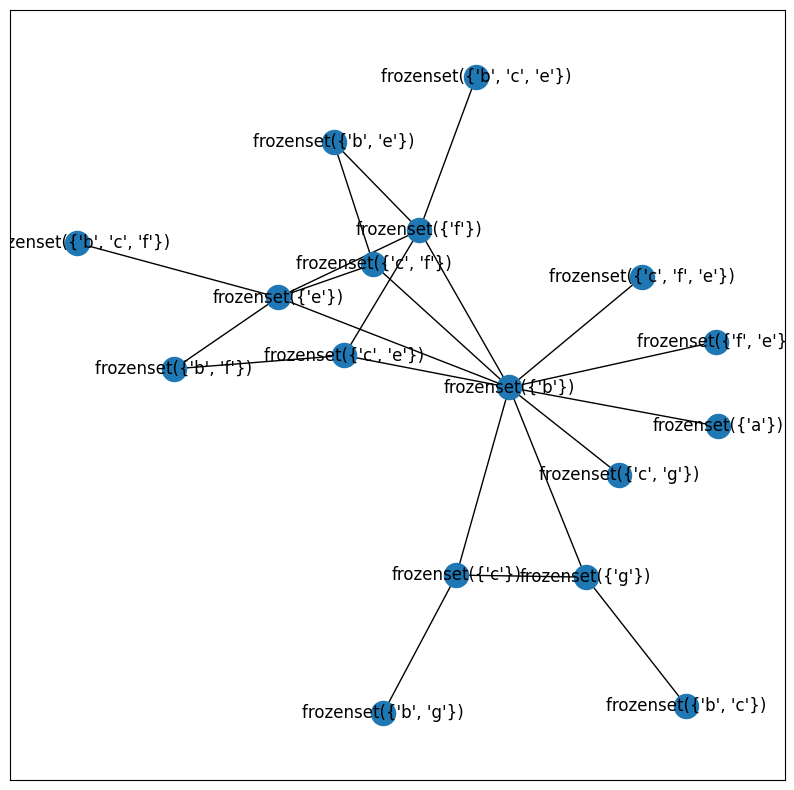

In [11]:
# 4.3.2.2 네트워크 그래프로 표현

# 연관규칙으로 부터 네트워크 그래프 생성
#
g = nx.from_pandas_edgelist( asso_rule_sp_4_7 ,
                            source = 'antecedents' ,
                            target = 'consequents',
                            edge_attr = ['support','confidence','lift'])
# 관련 정보 출력
print(g)

# 그래프 출력
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(g) # 배치
nx.draw_networkx ( g , pos , arrows = True  )

plt.show()

### 4.3.3 네트워크 출력 함수화

In [13]:
# 4.3.3 네트워크 다이어그램 반복 생성을 위한 함수화
# 4.3.3.1 함수 생성
def my_draw_nx (asso_rule_df, title = 'Network Graph', fontsize = 15,
                show_edgelabel = True) :

  import networkx as nx

  # antecedents,consequents 가 frozenset 이여서 레이블이 길다. 문자열로 변환
  nx_df = asso_rule_df.copy()
  nx_df['antecedents'] = nx_df['antecedents'].apply(lambda x : str(set(x)))
  nx_df['consequents'] = nx_df['consequents'].apply(lambda x : str(set(x)))

  # 연관규칙으로 부터 네트워크 그래프 생성

  g = nx.from_pandas_edgelist(nx_df,
                              source = 'antecedents',
                              target = 'consequents',
                              edge_attr =['support','confidence','lift']
                              )
  # 관련 정보 출력
  print(g)

  #  node 크기 계산
  d1 = {  row.antecedents : row['antecedent support']
          for ix, row in nx_df.iterrows()}
  d2 = {  row.consequents : row['consequent support']
          for ix, row in nx_df.iterrows()}
  d1.update(d2)
  node_size = np.array([ np.sqrt(d1[k]) * 600 for k in list(g)])

  # 그래프 출력
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(g,  weight= 'confidence', seed=42)
  #pos = nx.spring_layout(g, k = 0.30, weight= 'confidence')

  nx.draw_networkx_labels(g,pos,font_size=fontsize, )

  nx.draw_networkx(g,pos,  node_color = 'green',
                   with_labels = False,
                   alpha = 0.3 ,
                   arrows = True, arrowsize = fontsize,
                   node_size = node_size)

  if show_edgelabel :
    edge_d = { (row.antecedents, row.consequents)  :f'{row.lift:.2f}'
              for ix, row in nx_df.iterrows()}
    nx.draw_networkx_edge_labels(g, pos, edge_labels = edge_d)

  plt.title(title) # 그래프 제목

  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### NG asso_rule_sp_4_7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graph with 17 nodes and 22 edges


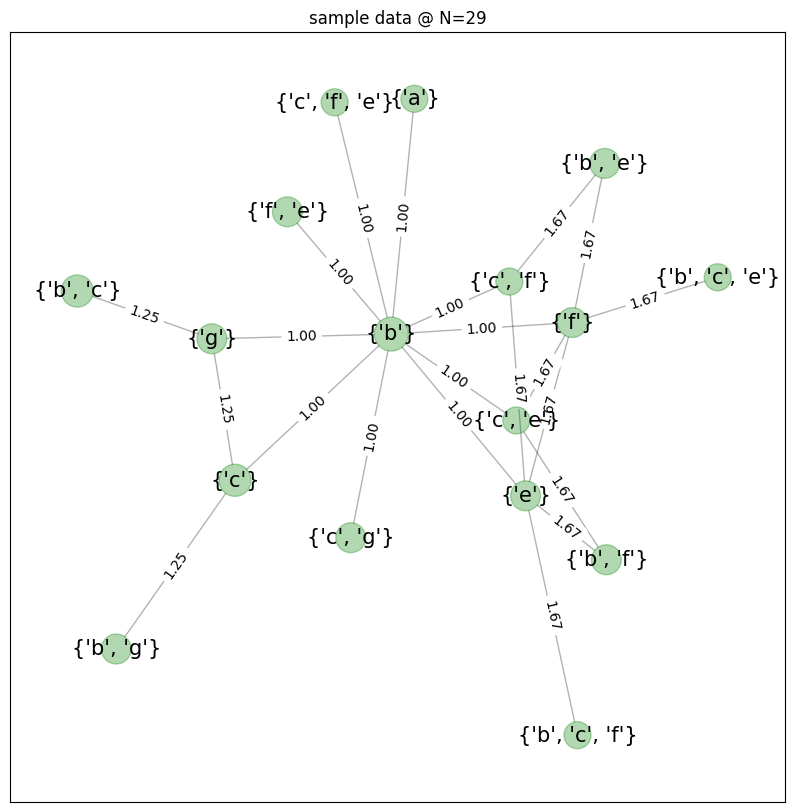

In [14]:
# 4.3.3.2 함수를 이용한 샘플데이터의 관계 그래프 출력
my_draw_nx( asso_rule_sp_4_7  ,title = 'sample data @ N=29' )

### 4.3.4 예시데이터 시각화

In [15]:
# 4.3.4 다양한 관계 규칙으로 그래프를 시도 (지지도를 0.5 이상으로 향상, 신뢰도 0.7)
# 4.3.4.1 간편하게 연관규칙을 도출하기 위해 apriori와 association_rules 일괄실행 함수화

def my_apri_asso (tr_df, min_sup=0.2, min_conf=0.5) :
  from mlxtend.frequent_patterns import apriori, association_rules

  # 빈발항목 생성
  freq_its = apriori (tr_df,
                      min_support = min_sup,
                      use_colnames = True)

  # 연관규칙 생성
  asso_rules = association_rules (freq_its,
                                  metric= 'confidence',
                                  min_threshold=min_conf)
  # 신뢰도, 향상도 내림차순 정렬
  asso_rules.sort_values(['confidence','lift'],
                         ascending = False,
                         inplace = True)

  # 빈발항목 및 연관규칙 건수 출력
  print (f'frequent itemlist size : {freq_its.shape[0]},',
         f' association rule size : {asso_rules.shape[0]}')


  return asso_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### NG asso_rule_sp_5_7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frequent itemlist size : 13,  association rule size : 19
Graph with 11 nodes and 12 edges


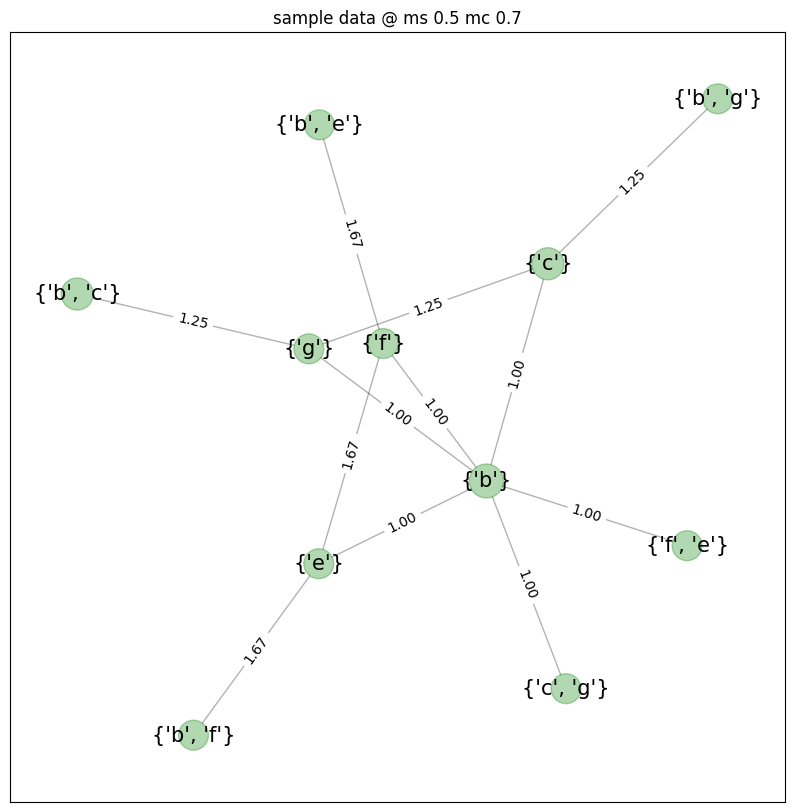

In [17]:
# 4.3.4.2 데이터 생성 후 네트워크 그래프 출력
#      sample_tr @ (지지도를 0.5 이상으로 향상, 신뢰도 0.7)
asso_rule_sp_5_7 = my_apri_asso( sample_tr , min_sup= 0.5, min_conf= 0.7 )
my_draw_nx(asso_rule_sp_5_7, 'sample data @ ms 0.5 mc 0.7')

### 4.3.5 grocery 시각화

#### NG asso_rule_gr_02_3

In [18]:
# 4.3.5 grocery 데이터의 연관규칙을 다양한 조건으로 시각화 하여 관찰한다.

# 4.3.5.1 Hands_on에서 진행한 최소지지도 0.02, 신뢰도 0.3 연관규칙 생성
asso_rule_gr_02_3 = my_apri_asso (grocery_tr, 0.02, 0.3)

frequent itemlist size : 122,  association rule size : 37


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graph with 28 nodes and 37 edges


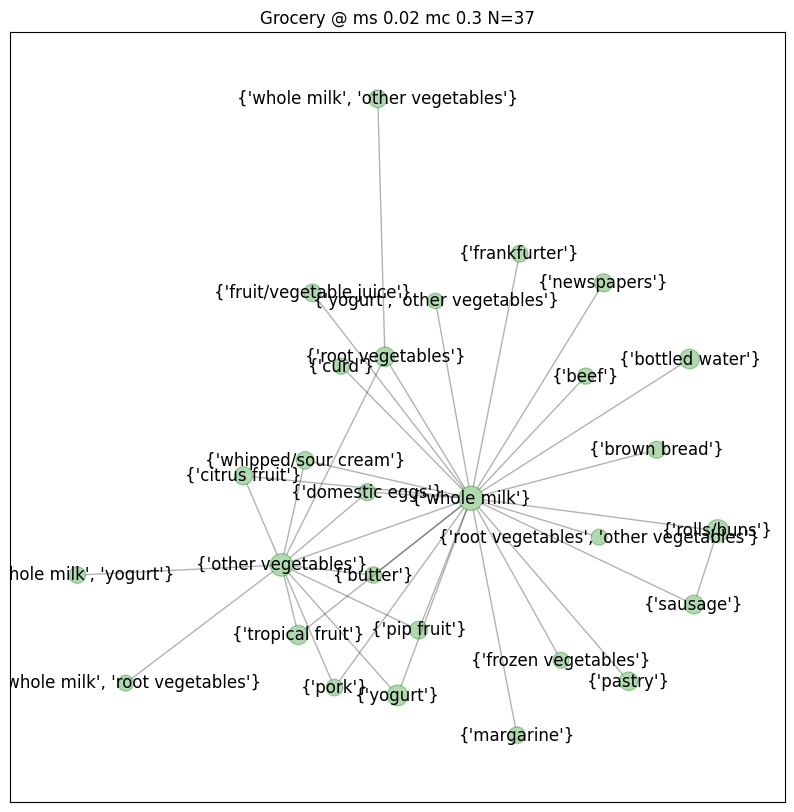

In [19]:
# 4.3.5.2 네트워크그래프 생성
my_draw_nx (asso_rule_gr_02_3 , 'Grocery @ ms 0.02 mc 0.3 N=37', fontsize = 12,
           show_edgelabel=False)

#### NG asso_rule_gr_02_4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frequent itemlist size : 122,  association rule size : 15
Graph with 15 nodes and 15 edges


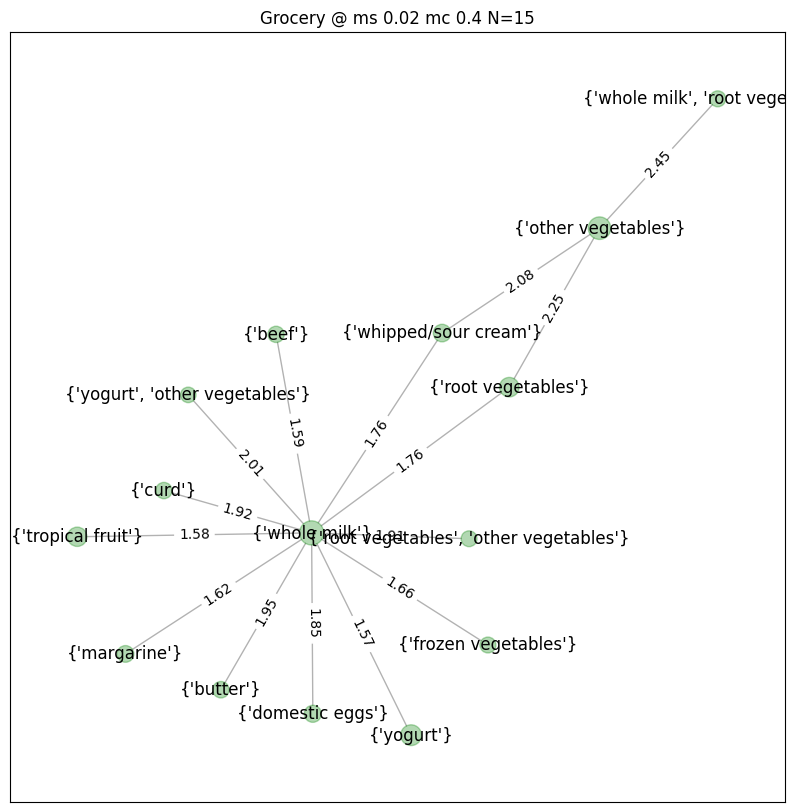

In [20]:
# 4.3.5.3 그래프가 복잡하다. 최소지지도 0.02, 최소신뢰도를 0.4로 상향 조정하여 살펴본다.
asso_rule_gr_02_4 = my_apri_asso(grocery_tr, min_sup = 0.02 , min_conf = 0.4 )
my_draw_nx ( asso_rule_gr_02_4 ,'Grocery @ ms 0.02 mc 0.4 N=15', fontsize = 12,
            show_edgelabel = True)

#### NG asso_rule_gr_01_2_yogurt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


frequent itemlist size : 333,  association rule size : 234
Graph with 43 nodes and 53 edges


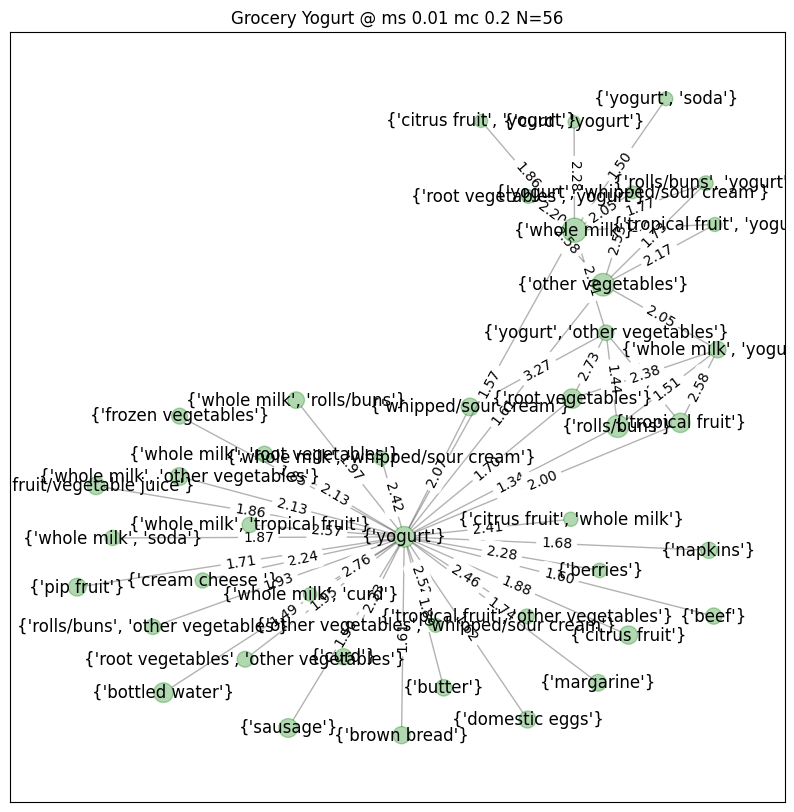

In [21]:
# 4.3.5.4 'yogurt' 와 관련된 관계가 궁금하다. 최소지지도 0.01, 최소신뢰도 0.2 에서 탐사해보자.
asso_rule_gr_01_2 = my_apri_asso(grocery_tr, 0.01, 0.2)

filter = asso_rule_gr_01_2.antecedents.apply(lambda x :'yogurt' in x) | \
         asso_rule_gr_01_2.consequents.apply(lambda x :'yogurt' in x)

asso_rule_gr_01_2_yogurt = asso_rule_gr_01_2[filter]

my_draw_nx (asso_rule_gr_01_2_yogurt,
            'Grocery Yogurt @ ms 0.01 mc 0.2 N=56',
            fontsize = 12,
            show_edgelabel = True)

#### NG asso_rule_gr_01_2_2_yogurt (lift>=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graph with 23 nodes and 27 edges


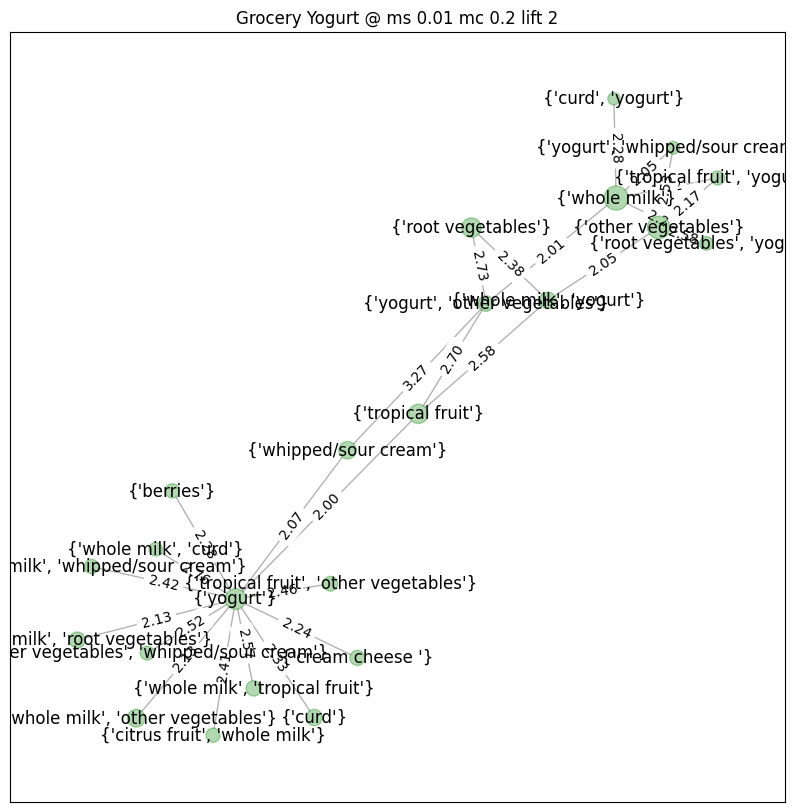

In [22]:
# 4.3.5.5 너무 복잡하다. lift >=2 조건을 추가해서 작성해보자.
asso_rule_gr_01_2_2_yogurt = asso_rule_gr_01_2_yogurt[asso_rule_gr_01_2_yogurt.lift >= 2]

asso_rule_gr_01_2_2_yogurt
my_draw_nx (asso_rule_gr_01_2_2_yogurt,
            'Grocery Yogurt @ ms 0.01 mc 0.2 lift 2',
            fontsize = 12,
            show_edgelabel = True)

In [24]:
# 4.3.5.6 'sausage' 와 'beef'에 구매성향에 차이가 있을까?

filter_sausage = asso_rule_gr_01_2.antecedents.apply(lambda x : 'sausage' in x) | \
         asso_rule_gr_01_2.consequents.apply(lambda x : 'sausage' in x)

filter_beef = asso_rule_gr_01_2.antecedents.apply(lambda x : 'beef' in x) | \
         asso_rule_gr_01_2.consequents.apply(lambda x : 'beef' in x)

asso_rule_gr_01_2_sausage = asso_rule_gr_01_2[  filter_sausage ]
asso_rule_gr_01_2_beef = asso_rule_gr_01_2[ filter_beef ]

asso_rule_gr_01_2_sausage.shape, asso_rule_gr_01_2_beef.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


((7, 10), (5, 10))

#### NG asso_rule_gr_01_2_sausage

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graph with 8 nodes and 7 edges


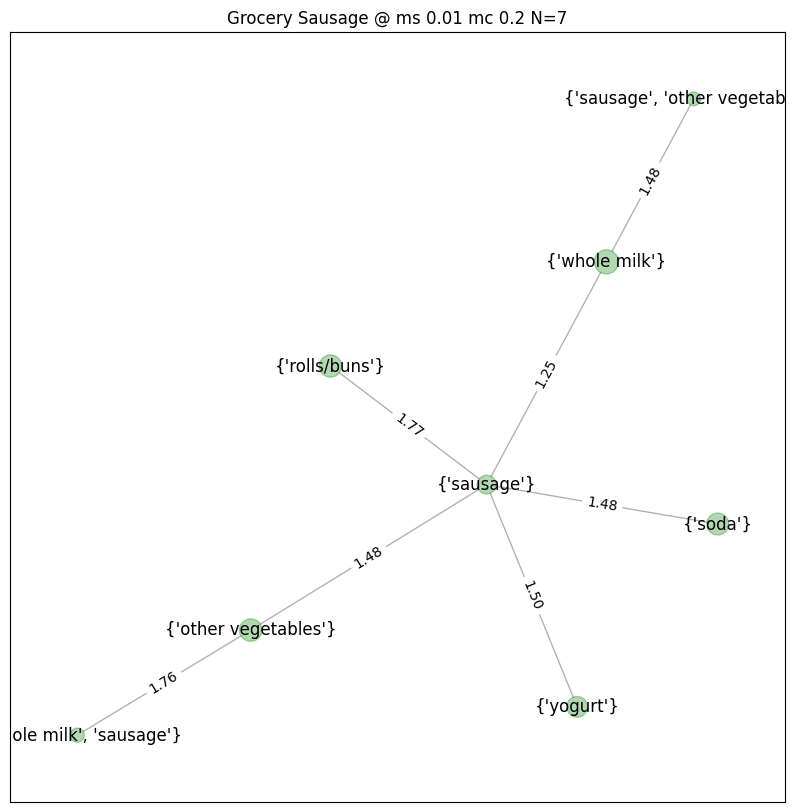

In [25]:
#  4.3.5.7 'sausage' 그래프 출력
my_draw_nx (asso_rule_gr_01_2_sausage,
            'Grocery Sausage @ ms 0.01 mc 0.2 N=7', fontsize = 12)

#### NG asso_rule_gr_01_2_beef

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graph with 6 nodes and 5 edges


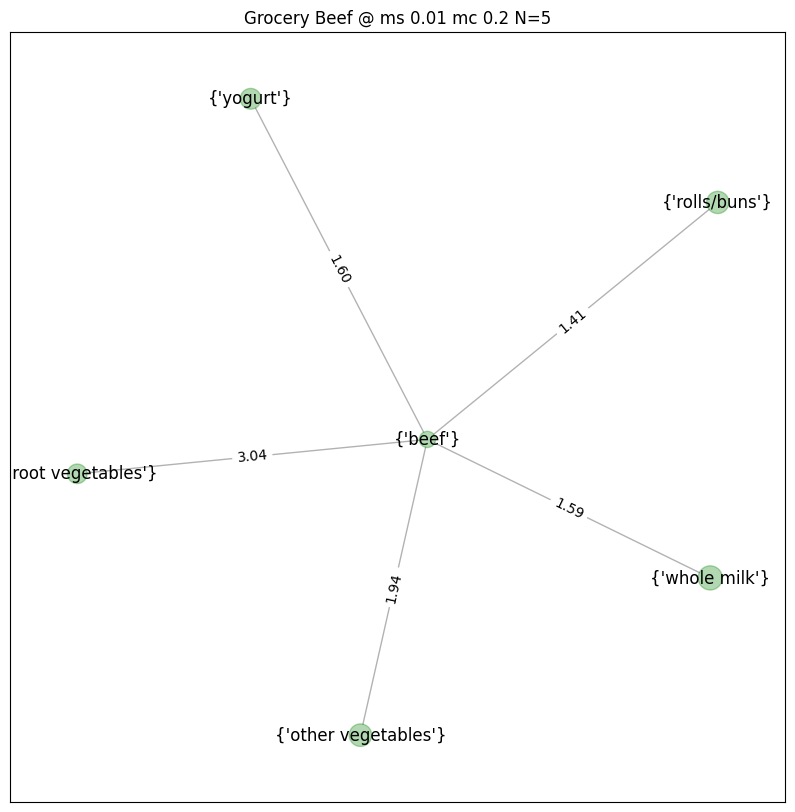

In [26]:
#  4.3.5.8 'beef' 그래프 출력
my_draw_nx (asso_rule_gr_01_2_beef,
            'Grocery Beef @ ms 0.01 mc 0.2 N=5', fontsize = 12)